# CVAI Übung: Convolution


### libraries

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import cv2 as cv

path = '/exchange/cvai/images/'

## read greylevel image

(1264, 1741)


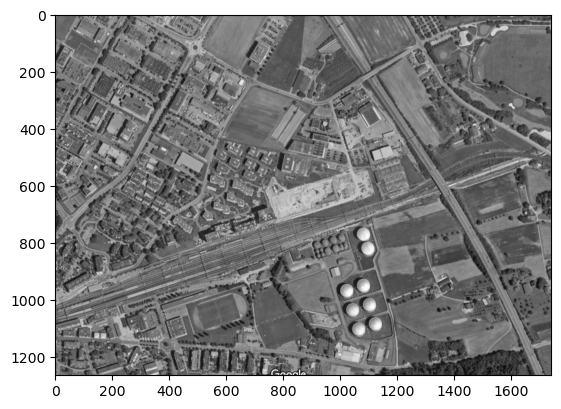

In [2]:
img = cv.cvtColor (cv.imread (path + 'air_image.png'), cv.COLOR_BGR2GRAY)
print (img.shape)
pl.imshow (img, cmap = 'gray')

## read pattern to recognize

(111, 93)


libpng warning: iCCP: profile 'ICC profile': 'GRAY': Gray color space not permitted on RGB PNG


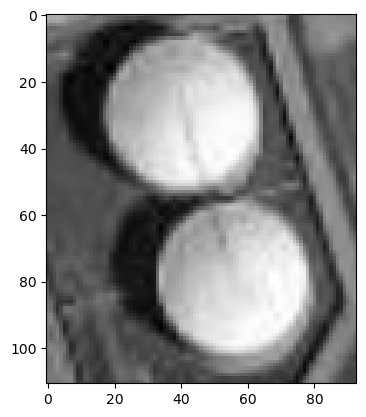

In [3]:
mask = cv.cvtColor (cv.imread (path + 'air_mask.png'), cv.COLOR_BGR2GRAY)
print (mask.shape)
pl.imshow (mask, cmap = 'gray')

## Exercise 1

Try to localize mask in image using correlation.

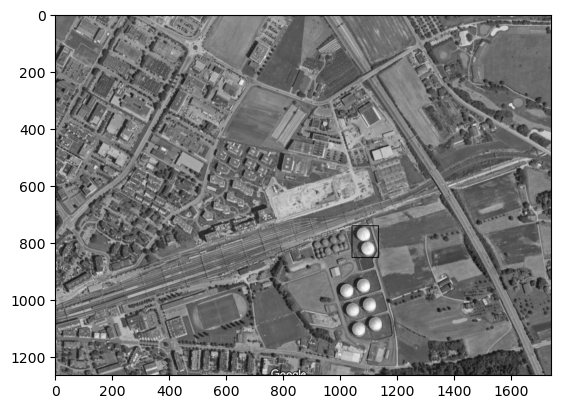

In [13]:
result = cv.matchTemplate(img, mask, cv.TM_CCOEFF_NORMED)

# Get the location of the maximum correlation value
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

# Draw a rectangle around the matched region
top_left = max_loc
height, width = mask.shape
bottom_right = (top_left[0] + width, top_left[1] + height)
cv.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

pl.imshow (img, cmap = 'gray')

As result you will localize the mask in the near of the right position, but not exactly.
Please think about the reason for this fail.

## Exercise 2

Try some operators for edge detection. Apply these operators to the image before repeating 
exercise 1 with thee preprocessed images. Is the result better now? Think about the reasons.

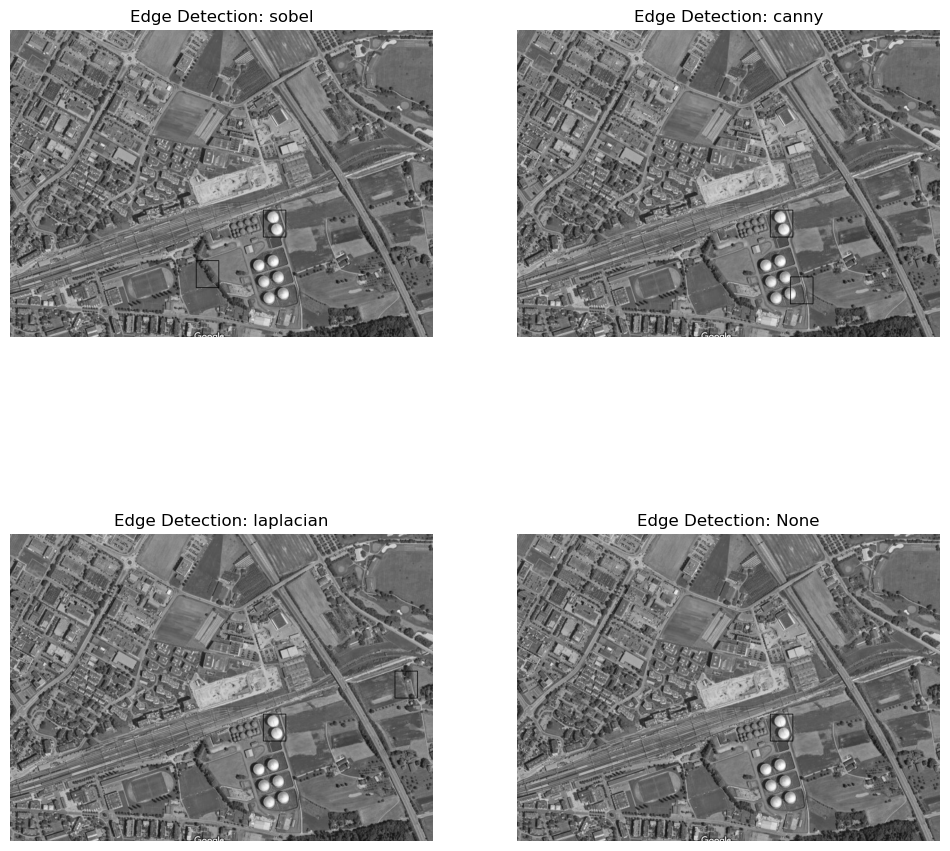

In [16]:
# Define a function to apply edge detection
def edge_detection(img, method):
    if method == 'sobel':
        # Sobel operator
        grad_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
        grad_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
        edges = cv.magnitude(grad_x, grad_y)
    elif method == 'canny':
        # Canny edge detection
        edges = cv.Canny(img, 100, 200)
    elif method == 'laplacian':
        # Laplacian edge detection
        edges = cv.Laplacian(img, cv.CV_64F)
        edges = np.uint8(np.absolute(edges))
    else:
        edges = img  # No edge detection applied
    return np.uint8(edges)  # Convert to CV_8U

# Apply different edge detection methods
methods = ['sobel', 'canny', 'laplacian', None]

# Set up the plotting area
fig, axes = pl.subplots(2, 2, figsize=(12, 12))

for idx, method in enumerate(methods):
    # Preprocess image with the selected edge detection method
    edge_img = edge_detection(img, method)

    # Perform template matching on the edge-detected image
    result = cv.matchTemplate(edge_img, mask, cv.TM_CCOEFF_NORMED)

    # Get the location of the best match
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

    # Draw a rectangle around the matched region
    top_left = max_loc
    height, width = mask.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)
    img_with_rect = np.copy(img)  # Copy to avoid modifying original image
    cv.rectangle(img_with_rect, top_left, bottom_right, (0, 255, 0), 2)

    # Show the edge-detected image and the result
    ax = axes[idx // 2, idx % 2]
    ax.imshow(img_with_rect, cmap='gray')
    ax.set_title(f'Edge Detection: {method if method else "None"}')
    ax.axis('off')

pl.show()